# Statistics Project

 Importing the library one by one as and when required

1) Importing pandas to read the data

In [4]:
import pandas as pd

2) Reading the data as dataframe

In [5]:
Insure_df=pd.read_csv('insurance.csv')

2.1) Checking if the data loaded correctly into the dataframe

In [6]:
Insure_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3) Performing Exploratory Data Analysis

3.1) Checking the shape of the dataframe

In [7]:
print("The no.of Rows are: ",Insure_df.shape[0])
print("The no.of Columns are: ",Insure_df.shape[1])

The no.of Rows are:  1338
The no.of Columns are:  7


3.2) Checking the datatype of each attribute

In [8]:
Insure_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Except the three variables "sex","smoker","region" which by visualizing the dataframe seems to be categorical variable & all other are numerical variable. 

3.3) Checking for presence of any missing values

In [9]:
Insure_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So as checked above there are no missing values in the dataframe

3.4) The 5-point summary of the numerical attributes viz. minimum value,Q1,Q2,Q3,maximum value

In [10]:
#Importing numpy to print only numerical attributes
import numpy as np
Insure_df.describe(exclude=[np.object])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


3.5) Distribution of "bmi","age","charges"

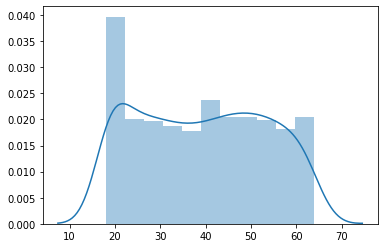

In [55]:
#Distribution of Age
import seaborn as sns
sns.distplot(Insure_df[['age']])

The distribution of age column seems mostly as uniform distribution

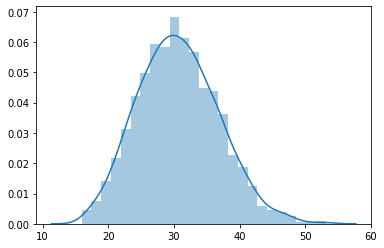

In [12]:
#Distribution of BMI
sns.distplot(Insure_df[['bmi']])

The distribution of 'BMI' is very much close to the Normal distribution

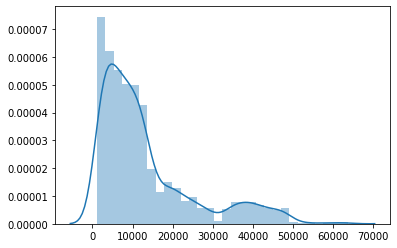

In [13]:
#Distribution of Charges
sns.distplot(Insure_df[['charges']])

The Distribution shows a normal distribution which is very much skewed on the right tail.

3.6) Measure of skewness of 'BMI','age','charges' columns

In [15]:
Insure_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

The skewness seems to be mostly positive which indicates the data is skewed towards the right side or on the right tail on all of the 'BMI','age','charges'column.Although the skewness on all the columns except charges is very much negligible.

3.7) Checking the presence of outliers in 'bmi','age','charges

The Q3 is: 51.0
The Q1 is: 27.0
The IQR is: 24.0
The outlier at lower side lie below  -9.0
The outlier at upper side lie above  87.0


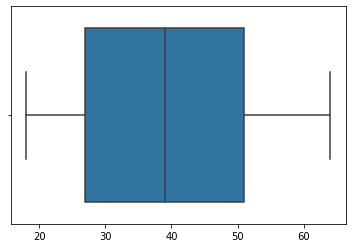

In [16]:
Q3=Insure_df['age'].quantile(q=0.75) 
Q1=Insure_df['age'].quantile(q=0.25)
IQR=Q3-Q1
print("The Q3 is:",Q3)
print("The Q1 is:",Q1)
print("The IQR is:",IQR)
Limit=IQR*1.5
LowerOutlier=Q1-Limit
UpperOutlier=Q3+Limit
print("The outlier at lower side lie below ",LowerOutlier)
print("The outlier at upper side lie above ",UpperOutlier)
sns.boxplot(x=Insure_df[['age']])

As the boxplot shows no values out of the lower side limit & upper side limit there are no outliers

The Q3 is: 34.69375
The Q1 is: 26.29625
The IQR is: 8.3975
The outlier at lower side is: 13.7
The outlier at upper side is: 47.290000000000006


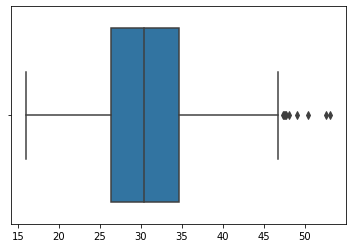

In [17]:
Q3=Insure_df['bmi'].quantile(q=0.75) 
Q1=Insure_df['bmi'].quantile(q=0.25)
IQR=Q3-Q1
print("The Q3 is:",Q3)
print("The Q1 is:",Q1)
print("The IQR is:",IQR)
Limit=IQR*1.5
LowerOutlier=Q1-Limit
UpperOutlier=Q3+Limit
print("The outlier at lower side is:",LowerOutlier)
print("The outlier at upper side is:",UpperOutlier)
sns.boxplot(x=Insure_df[['bmi']])

There are values above the largest value of the boxplot which lie above the calculated outlier limit & hence there are outliers at the upper side which indicate there is a right skewed distribution

The Q3 is: 16639.912515
The Q1 is: 4740.28715
The IQR is: 11899.625365
The outlier at lower side is: -13109.1508975
The outlier at upper side is: 34489.350562499996


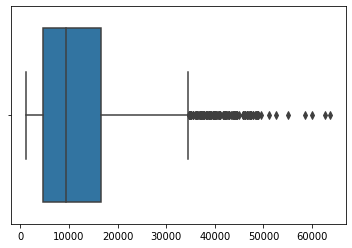

In [18]:
Q3=Insure_df['charges'].quantile(q=0.75) 
Q1=Insure_df['charges'].quantile(q=0.25)
IQR=Q3-Q1
print("The Q3 is:",Q3)
print("The Q1 is:",Q1)
print("The IQR is:",IQR)
Limit=IQR*1.5
LowerOutlier=Q1-Limit
UpperOutlier=Q3+Limit
print("The outlier at lower side is:",LowerOutlier)
print("The outlier at upper side is:",UpperOutlier)
sns.boxplot(x=Insure_df[['charges']])

There are values above the largest value of the boxplot which lie above the calculated outlier limit & hence there are outliers at the upper side which indicate there is a right skewed distribution

3.8) Distribution of categorical columns

male      676
female    662
Name: sex, dtype: int64

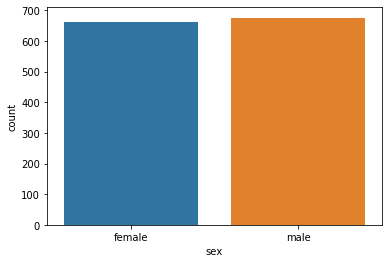

In [19]:
sns.countplot(Insure_df['sex'])
Insure_df['sex'].value_counts()

The no. of female contractor's are less than male contractor's yet the difference is not too huge.  

no     1064
yes     274
Name: smoker, dtype: int64

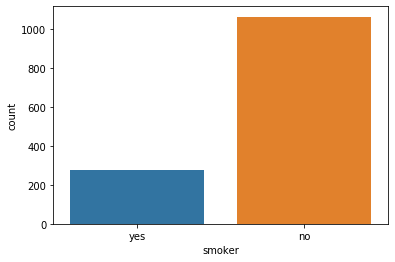

In [20]:
sns.countplot(Insure_df['smoker'])
Insure_df['smoker'].value_counts()

The no. of smoker's is less than the no. of non-smoker which shows that a lot of non-smoker or could be stated as "health-conscious" people in a way are very much aware about the insurance.As per the data the amount of smokers are less aware of the insurance eventhough the case should be quite opposite as they are the one's supposedly facing a health consequences sooner than the non-smokers most probably.

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

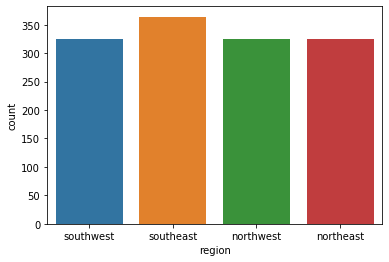

In [21]:
sns.countplot(x=Insure_df['region'])
Insure_df['region'].value_counts()

The plot shows beneficiaries in different regions of US which shows the max. benficiaries are insoutheast region whereas the least are in northeast.So this shows a chance to increase the awareness in other regions except the souutheast.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

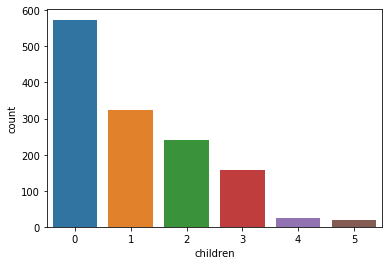

In [22]:
sns.countplot(x=Insure_df['children'])
Insure_df['children'].value_counts()

The plot is in descending order as the no of children increases, which shows that there are no dependents/children with maximum count whereas the no. of children/dependents increases the beneficiary count goes on decreasing which is like a inverse proportion.
No. of children=1/No. of children covered with the insurance

3.9) Pairplot that includes all the columns of dataframe

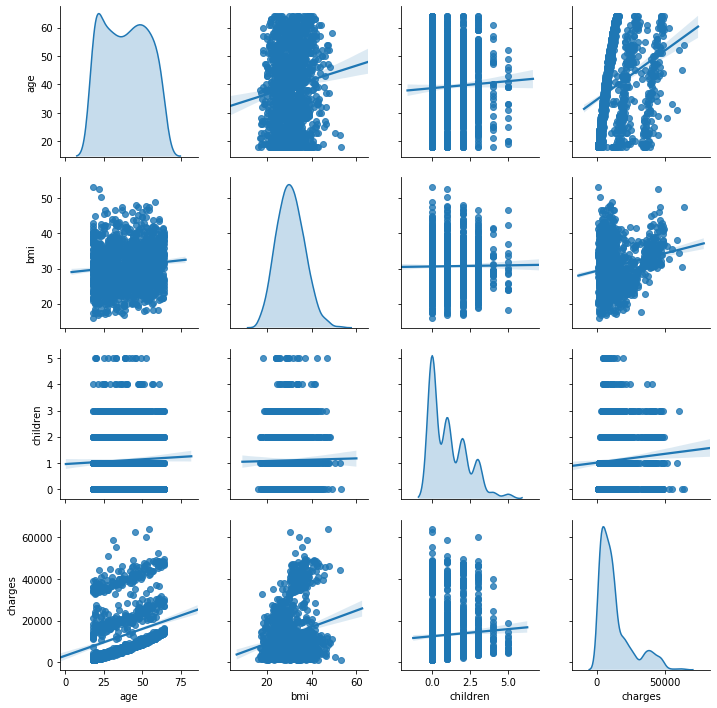

In [25]:
sns.pairplot(Insure_df,kind='reg',diag_kind='kde')

4.a) Do charges of the people who smoke differ significantly from the people who don't?

In [23]:
#Formulationg Hyposthesis
#Null Hypothesis H0:- Charges of people who smoke doesn't differ from people who don't
#Alternate Hypothesis H1:-Charges of people who smoke does differ from people who don't

In [24]:
Insure1_df=pd.DataFrame(Insure_df[['smoker','charges']])
Insure12_df=Insure1_df.groupby('smoker')
Insure10_df=pd.DataFrame(Insure12_df.get_group('yes'))
Insure11_df=pd.DataFrame(Insure12_df.get_group('no'))

Insure10_df=Insure10_df.drop(labels='smoker',axis=1)
Insure11_df=Insure11_df.drop(labels='smoker',axis=1)

print("people who smoke's mean:",Insure10_df['charges'].mean())
print("people who don't smoke's mean:",Insure11_df['charges'].mean())
print("people who smoke's variance:",Insure10_df['charges'].var())
print("people who don't smoke's variance:",Insure11_df['charges'].var())
print("people who smoke's std. dev:",Insure10_df['charges'].std())
print("people who don't smoke's std. dev:",Insure11_df['charges'].std())
from scipy.stats import ttest_ind
stat , pvalue = ttest_ind(Insure10_df['charges'], Insure11_df['charges'], equal_var=True)
print("The tstat is:",stat)
print("The p-value is:",pvalue)
if pvalue < 0.05:
    print("Since the p-value is less than the level of significance which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis")
else:
    print("Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis")

people who smoke's mean: 32050.23183153285
people who don't smoke's mean: 8434.268297856199
people who smoke's variance: 133207311.20634921
people who don't smoke's variance: 35925420.49611172
people who smoke's std. dev: 11541.547175589121
people who don't smoke's std. dev: 5993.781819194933
The tstat is: 46.664921172723716
The p-value is: 8.271435842177219e-283
Since the p-value is less than the level of significance which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis


4.b) Does bmi of male differ significantly from that of females?

In [25]:
##Null hypothesis H0:BMI of male does not significantly differ from that of females
##Alternate hypothesis H1:BMI of male differs significantly from that of females

In [26]:
Insure2_df=pd.DataFrame(Insure_df.iloc[:,1:3])
Insure22_df=Insure2_df.groupby('sex')
Insure20_df=pd.DataFrame(Insure22_df.get_group('female'))
Insure21_df=pd.DataFrame(Insure22_df.get_group('male'))

Insure20_df=Insure20_df.drop(labels='sex',axis=1)
Insure21_df=Insure21_df.drop(labels='sex',axis=1)

from scipy.stats import ttest_ind
stat1 , pvalue1 = ttest_ind(Insure20_df['bmi'], Insure21_df['bmi'], equal_var=True)
print("The tstat is:",stat1)
print("The p-value is:",pvalue1)
if pvalue1 < 0.05:
    print("Since the p-value is less than the level of significance which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis")
else:
    print("Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis")

The tstat is: -1.696752635752224
The p-value is: 0.08997637178984932
Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis


4.c) Is the proportion of smokers significantly different in different genders?

In [27]:
##Null Hypothesis H0:Proportion of smokers in different genders is not different i.e. pi1=pi2,pi1-pi2=0 where pi1 is male smokers proportion & pi2 is ##Null Hypothesis H0:Proportion of smokers in different genders is not different i.e. pi1=pi2 where pi1 is male smokers proportion & pi2 is female smokers proportion  
#3Alternate Hypothesis H1: Proportion of smokers in different genders is significantly different i.e. pi1~=pi2,pi-pi2~=0

In [28]:
Insure3_df=pd.DataFrame(Insure_df[['smoker','sex']])
Insure32_df=Insure3_df.groupby('smoker')
Insure30_df=pd.DataFrame(Insure32_df.get_group('yes'))
Insure30_df=Insure30_df.drop(labels='smoker',axis=1)
Male,Female=Insure30_df['sex'].value_counts()
#Assuming the alpha to be 0.05 hence the corresponding critical-value for the two-tail test would be -1.96 & +1.96
##Hence Zstat<-1.96 of Zstat>1.96 will lead to rejection of Null-Hypothesis
Total_Male,Total_Female=Insure_df['sex'].value_counts()
p1=Male/Total_Male
p2=Female/Total_Female
#Assuming pi1=pi2 which means pi1-pi2=0 since we're trying to prove the null hypothesis
pbar=(Male+Female)/(Total_Male+Total_Female)
from math import sqrt
Zstat=(p1-p2)-0/sqrt(pbar*(1-pbar)*((1/Total_Male)+(1/Total_Female)))
critical_value1=-1.96
critical_value2=1.96
print("The Zstat is:",Zstat)
if critical_value1<=Zstat<=critical_value2:
    print("Since the Zstat lies within the limits of critical value which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis")
else:    
    print("Since the Zstat doesn't lie within the limits of critical value which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis")

The Zstat is: 0.06149108850712384
Since the Zstat lies within the limits of critical value which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis


4.d) Is the distribution of bmi across women with no children, one child and two children, the same ?

In [ ]:
##Null Hypothesis H0:The distribution of bmi across women with one child,two child or no child is the same
##Altenrate Hypothesis H1:The distribution of bmi across women with one child,two child or no child is not the same

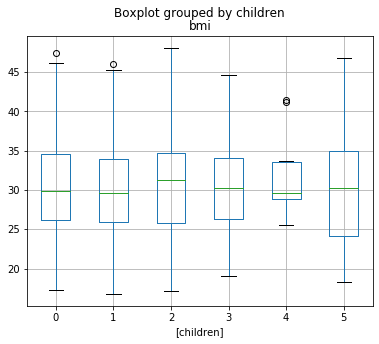

In [49]:
Insure4_df=pd.DataFrame(Insure_df[['bmi','sex','children']])
Insure42_df=Insure4_df.groupby('sex')
Insure40_df=pd.DataFrame(Insure42_df.get_group('female'))
Insure40_df.boxplot(by='children',figsize=(6,5))
Insure41_df=Insure40_df.loc[Insure40_df['children']==0,'bmi']
Insure43_df=Insure40_df.loc[Insure40_df['children']==1,'bmi']
Insure44_df=Insure40_df.loc[Insure40_df['children']==2,'bmi']

In [54]:
##Null Hypothesis H0:Variance of all the 3 data-set i.e. women with no child,1 child & 2 child are homegenous
##Alternate Hypothesis H1:Vairance of all the 3 data-set i.e. women with no child,1 child & 2 child are non-homogenous
from scipy.stats import levene
stat,pv=levene(Insure41_df,Insure43_df,Insure44_df)
print("The F-stat is:",stat)
print("The pvalue is:",pv)
if pv>0.05:
    print("There is homogenity of variance hence the ANOVA condition is satisfied")
else:
    print("There is no homogenity in the variance hence the ANOVA condition is un-satisfied")

The F-stat is: 0.9433311607108589
The pvalue is: 0.3899432394522804
There is homogenity of variance hence the ANOVA condition is satisfied


In [48]:
  from scipy.stats import f_oneway
F,p=f_oneway(Insure41_df,Insure43_df,Insure44_df)
print("F-statistic is:",F)
print("p-value is:",p)

if p < 0.05:
    print("Since the p-value is less than the level of significance which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis")
else:
    print("Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis")

F-statistic is: 0.3344720147757968
p-value is: 0.7158579926754841
Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis
